# Grad-CAM Inscribed DCA Notebook

This notebook is used to prove that the baseline network is using the DCA to predict the class.

## Imports

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')
import gradcam
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

2022-08-15 10:05:25.757204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-15 10:05:25.757218: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load in Models

Enter the paths to each model required.

In [2]:
# clean
base_model = keras.models.load_model(r"/home/sam/Repositories/temp/artifact_project/models/clean/InceptionResNetV2/SGD/64/InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5")

# bin
bin_model = keras.models.load_model(r"/home/sam/Repositories/temp/artifact_project/models/dca_binary/InceptionResNetV2/SGD/64/InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5")

# real
real_model = keras.models.load_model(r"/home/sam/Repositories/temp/artifact_project/models/dca_realistic/InceptionResNetV2/SGD/64/InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5")




# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\clean\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.29.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_binary\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.15.h5
# D:\OneDrive - MMU\Journal_Project\Models\balanced_dca_set\dca_realistic\InceptionResNetV2\SGD\64\InceptionResNetV2_batchSize_0_opt_SGD_model.30.h5

2022-08-15 10:08:46.984196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-15 10:08:46.984326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sam/miniconda3/envs/dev/lib/python3.10/site-packages/cv2/../../../../lib:
2022-08-15 10:08:46.984354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sam/miniconda3/envs/dev/lib/python3.10/site-packages/cv2/../../../../lib:
2022-08-15 10:08:46.984380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libc

## Load images

In [3]:

small_image_name = "ISIC2019_0054270_oth"
small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/small/oth/ISIC2019_0054270_oth.jpg")
small_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)

ns_small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/small/oth/ISIC2019_0054270_oth.png")
ns_small_image = cv2.cvtColor(ns_small_image, cv2.COLOR_BGR2RGB)

telea_small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/small/oth/ISIC2019_0054270_oth.png")
telea_small_image = cv2.cvtColor(telea_small_image, cv2.COLOR_BGR2RGB)



medium_image_name = "ISIC2019_0062518_oth"
medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/medium/oth/ISIC2019_0062518_oth.jpg")
medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)

ns_medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/medium/oth/ISIC2019_0062518_oth.png")
ns_medium_image = cv2.cvtColor(ns_medium_image, cv2.COLOR_BGR2RGB)

telea_medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/medium/oth/ISIC2019_0062518_oth.png")
telea_medium_image = cv2.cvtColor(telea_medium_image, cv2.COLOR_BGR2RGB)



large_image_name = "ISIC2019_0061397_oth"
large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/large/oth/ISIC2019_0061397_oth.jpg")
large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB)

ns_large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/large/oth/ISIC2019_0061397_oth.png")
ns_large_image = cv2.cvtColor(ns_large_image, cv2.COLOR_BGR2RGB)

telea_large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/large/oth/ISIC2019_0061397_oth.png")
telea_large_image = cv2.cvtColor(telea_large_image, cv2.COLOR_BGR2RGB)





oth_image_name = "ISIC2019_0064798_oth"
oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/oth/oth/ISIC2019_0064798_oth.jpg")
oth_image = cv2.cvtColor(oth_image, cv2.COLOR_BGR2RGB)

ns_oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/oth/oth/ISIC2019_0064798_oth.png")
ns_oth_image = cv2.cvtColor(ns_oth_image, cv2.COLOR_BGR2RGB)

telea_oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/oth/oth/ISIC2019_0064798_oth.png")
telea_oth_image = cv2.cvtColor(telea_oth_image, cv2.COLOR_BGR2RGB)

# finish off clean images
small_image = small_image.astype('float32') / 255
small_image = np.expand_dims(small_image, axis=0)

ns_small_image = ns_small_image.astype('float32') / 255
ns_small_image = np.expand_dims(ns_small_image, axis=0)

telea_small_image = telea_small_image.astype('float32') / 255
telea_small_image = np.expand_dims(telea_small_image, axis=0)



medium_image = medium_image.astype('float32') / 255
medium_image = np.expand_dims(medium_image, axis=0)

ns_medium_image = ns_medium_image.astype('float32') / 255
ns_medium_image = np.expand_dims(ns_medium_image, axis=0)

telea_medium_image = telea_medium_image.astype('float32') / 255
telea_medium_image = np.expand_dims(telea_medium_image, axis=0)



                        
large_image = large_image.astype('float32') / 255
large_image = np.expand_dims(large_image, axis=0)

ns_large_image = ns_large_image.astype('float32') / 255
ns_large_image = np.expand_dims(ns_large_image, axis=0)

telea_large_image = telea_large_image.astype('float32') / 255
telea_large_image = np.expand_dims(telea_large_image, axis=0)





oth_image = oth_image.astype('float32') / 255
oth_image = np.expand_dims(oth_image, axis=0)

ns_oth_image = ns_oth_image.astype('float32') / 255
ns_oth_image = np.expand_dims(ns_oth_image, axis=0)

telea_oth_image = telea_oth_image.astype('float32') / 255
telea_oth_image = np.expand_dims(telea_oth_image, axis=0)





# large 1 - ISIC2019_0053821_oth.jpg
# large 2 - ISIC2019_0054304_oth.jpg
# large 3 - ISIC2019_0055495_oth.jpg
# large 4 - ISIC2019_0057233_oth.jpg
# large 5 - ISIC2019_0057493_oth.jpg
# large 6 - ISIC2019_0058606_oth.jpg
# large 7 - ISIC2019_0059418_oth.jpg

# medium 8 - ISIC2019_0053688_oth.jpg
# medium 9 - ISIC2019_0054077_oth.jpg
# medium 10 - ISIC2019_0055313_oth.jpg
# medium 11 - ISIC2019_0056383_oth.jpg
# medium 12 - ISIC2019_0056656_oth.jpg
# medium 13 - ISIC2019_0058686_oth.jpg
# medium 14 - ISIC2019_0059744_oth.jpg

# small 15 - ISIC2019_0000274_oth.jpg
# small 16 - ISIC2019_0027815_oth.jpg
# small 17 - ISIC2019_0029012_oth.jpg
# small 18 - ISIC2019_0029897_oth.jpg
# small 19 - ISIC2019_0032756_oth.jpg
# small 20 - ISIC2019_0053577_oth.jpg
# small 21 - ISIC2019_0053750_oth.jpg

# other 22 - ISIC2019_0000251_oth.jpg
# other 23 - ISIC2019_0000352_oth.jpg
# other 24 - ISIC2019_0054508_oth.jpg
# other 25 - ISIC2019_0056370_oth.jpg
# other 26 - ISIC2019_0064718_oth.jpg
# other 27 - ISIC2019_0066728_oth.jpg
# other 28 - ISIC2019_0069252_oth.jpg


## Generate Predictions

In [4]:
ns_base_small_pred = base_model.predict(ns_small_image)
telea_base_small_pred = base_model.predict(telea_small_image)

ns_base_medium_pred = base_model.predict(ns_medium_image)
telea_base_medium_pred = base_model.predict(telea_medium_image)

ns_base_large_pred = base_model.predict(ns_large_image)
telea_base_large_pred = base_model.predict(telea_large_image)

ns_base_oth_pred = base_model.predict(ns_oth_image)
telea_base_oth_pred = base_model.predict(telea_oth_image)




ns_bin_small_pred = bin_model.predict(ns_small_image)
telea_bin_small_pred = bin_model.predict(telea_small_image)

ns_bin_medium_pred = bin_model.predict(ns_medium_image)
telea_bin_medium_pred = bin_model.predict(telea_medium_image)

ns_bin_large_pred = bin_model.predict(ns_large_image)
telea_bin_large_pred = bin_model.predict(telea_large_image)

ns_bin_oth_pred = bin_model.predict(ns_oth_image)
telea_bin_oth_pred = bin_model.predict(telea_oth_image)





ns_real_small_pred = real_model.predict(ns_small_image)
telea_real_small_pred = real_model.predict(telea_small_image)

ns_real_medium_pred = real_model.predict(ns_medium_image)
telea_real_medium_pred = real_model.predict(telea_medium_image)

ns_real_large_pred = real_model.predict(ns_large_image)
telea_real_large_pred = real_model.predict(telea_large_image)

ns_real_oth_pred = real_model.predict(ns_oth_image)
telea_real_oth_pred = real_model.predict(telea_oth_image)





base_small_pred = base_model.predict(small_image)
base_medium_pred = base_model.predict(medium_image)
base_large_pred = base_model.predict(large_image)
base_oth_pred = base_model.predict(oth_image)

bin_small_pred = bin_model.predict(small_image)
bin_medium_pred = bin_model.predict(medium_image)
bin_large_pred = bin_model.predict(large_image)
bin_oth_pred = bin_model.predict(oth_image)

real_small_pred = real_model.predict(small_image)
real_medium_pred = real_model.predict(medium_image)
real_large_pred = real_model.predict(large_image)
real_oth_pred = real_model.predict(oth_image)



ns_base_small_i = np.argmax(ns_base_small_pred[0])
telea_base_small_i = np.argmax(telea_base_small_pred[0])

ns_base_medium_i = np.argmax(ns_base_medium_pred[0])
telea_base_medium_i = np.argmax(telea_base_medium_pred[0])

ns_base_large_i = np.argmax(ns_base_large_pred[0])
telea_base_large_i = np.argmax(telea_base_large_pred[0])

ns_base_oth_i = np.argmax(ns_base_oth_pred[0])
telea_base_oth_i = np.argmax(telea_base_oth_pred[0])





ns_bin_small_i = np.argmax(ns_bin_small_pred[0])
telea_bin_small_i = np.argmax(telea_bin_small_pred[0])

ns_bin_medium_i = np.argmax(ns_bin_medium_pred[0])
telea_bin_medium_i = np.argmax(telea_bin_medium_pred[0])

ns_bin_large_i = np.argmax(ns_bin_large_pred[0])
telea_bin_large_i = np.argmax(telea_bin_large_pred[0])

ns_bin_oth_i = np.argmax(ns_bin_oth_pred[0])
telea_bin_oth_i = np.argmax(telea_bin_oth_pred[0])




ns_real_small_i = np.argmax(ns_real_small_pred[0])
telea_real_small_i = np.argmax(telea_real_small_pred[0])

ns_real_medium_i = np.argmax(ns_real_medium_pred[0])
telea_real_medium_i = np.argmax(telea_real_medium_pred[0])

ns_real_large_i = np.argmax(ns_real_large_pred[0])
telea_real_large_i = np.argmax(telea_real_large_pred[0])

ns_real_oth_i = np.argmax(ns_real_oth_pred[0])
telea_real_oth_i = np.argmax(telea_real_oth_pred[0])







base_small_i = np.argmax(base_small_pred[0])
base_medium_i = np.argmax(base_medium_pred[0])
base_large_i = np.argmax(base_large_pred[0])
base_oth_i = np.argmax(base_oth_pred[0])

bin_small_i = np.argmax(bin_small_pred[0])
bin_medium_i = np.argmax(bin_medium_pred[0])
bin_large_i = np.argmax(bin_large_pred[0])
bin_oth_i = np.argmax(bin_oth_pred[0])

real_small_i = np.argmax(real_small_pred[0])
real_medium_i = np.argmax(real_medium_pred[0])
real_large_i = np.argmax(real_large_pred[0])
real_oth_i = np.argmax(real_oth_pred[0])


1/1 [==============================] - 0s 49ms/step


## Create Grad-CAM heatmaps

In [5]:
ns_base_small_cam = gradcam.GradCAM(base_model, ns_base_small_i, 'conv_7b_ac')
telea_base_small_cam = gradcam.GradCAM(base_model, telea_base_small_i, 'conv_7b_ac')

ns_base_medium_cam = gradcam.GradCAM(base_model, ns_base_medium_i, 'conv_7b_ac')
telea_base_medium_cam = gradcam.GradCAM(base_model, telea_base_medium_i, 'conv_7b_ac')

ns_base_large_cam = gradcam.GradCAM(base_model, ns_base_large_i, 'conv_7b_ac')
telea_base_large_cam = gradcam.GradCAM(base_model, telea_base_large_i, 'conv_7b_ac')

ns_base_oth_cam = gradcam.GradCAM(base_model, ns_base_oth_i, 'conv_7b_ac')
telea_base_oth_cam = gradcam.GradCAM(base_model, telea_base_oth_i, 'conv_7b_ac')




ns_bin_small_cam = gradcam.GradCAM(bin_model, ns_bin_small_i, 'conv_7b_ac')
telea_bin_small_cam = gradcam.GradCAM(bin_model, telea_bin_small_i, 'conv_7b_ac')

ns_bin_medium_cam = gradcam.GradCAM(bin_model, ns_bin_medium_i, 'conv_7b_ac')
telea_bin_medium_cam = gradcam.GradCAM(bin_model, telea_bin_medium_i, 'conv_7b_ac')

ns_bin_large_cam = gradcam.GradCAM(bin_model, ns_bin_large_i, 'conv_7b_ac')
telea_bin_large_cam = gradcam.GradCAM(bin_model, telea_bin_large_i, 'conv_7b_ac')

ns_bin_oth_cam = gradcam.GradCAM(bin_model, ns_bin_oth_i, 'conv_7b_ac')
telea_bin_oth_cam = gradcam.GradCAM(bin_model, telea_bin_oth_i, 'conv_7b_ac')




ns_real_small_cam = gradcam.GradCAM(real_model, ns_real_small_i, 'conv_7b_ac')
telea_real_small_cam = gradcam.GradCAM(base_model, telea_base_small_i, 'conv_7b_ac')

ns_real_medium_cam = gradcam.GradCAM(real_model, ns_real_medium_i, 'conv_7b_ac')
telea_real_medium_cam = gradcam.GradCAM(real_model, telea_base_medium_i, 'conv_7b_ac')

ns_real_large_cam = gradcam.GradCAM(real_model, ns_real_large_i, 'conv_7b_ac')
telea_real_large_cam = gradcam.GradCAM(real_model, telea_real_large_i, 'conv_7b_ac')

ns_real_oth_cam = gradcam.GradCAM(real_model, ns_real_oth_i, 'conv_7b_ac')
telea_real_oth_cam = gradcam.GradCAM(real_model, telea_real_oth_i, 'conv_7b_ac')





base_small_cam = gradcam.GradCAM(base_model, base_small_i, 'conv_7b_ac')
base_medium_cam = gradcam.GradCAM(base_model, base_medium_i, 'conv_7b_ac')
base_large_cam = gradcam.GradCAM(base_model, base_large_i, 'conv_7b_ac')
base_oth_cam = gradcam.GradCAM(base_model, base_oth_i, 'conv_7b_ac')

bin_small_cam =  gradcam.GradCAM(bin_model, bin_small_i, 'conv_7b_ac')
bin_medium_cam = gradcam.GradCAM(bin_model, bin_medium_i, 'conv_7b_ac')
bin_large_cam =  gradcam.GradCAM(bin_model, bin_large_i, 'conv_7b_ac')
bin_oth_cam =    gradcam.GradCAM(bin_model, bin_oth_i, 'conv_7b_ac')

real_small_cam =  gradcam.GradCAM(real_model, real_small_i, 'conv_7b_ac')
real_medium_cam = gradcam.GradCAM(real_model, real_medium_i, 'conv_7b_ac')
real_large_cam =  gradcam.GradCAM(real_model, real_large_i, 'conv_7b_ac')
real_oth_cam =    gradcam.GradCAM(real_model, real_oth_i, 'conv_7b_ac')


ns_base_small_heatmap =  ns_base_small_cam.compute_heatmap(ns_small_image)
telea_base_small_heatmap =  telea_base_small_cam.compute_heatmap(telea_small_image)

ns_base_medium_heatmap =  ns_base_medium_cam.compute_heatmap(ns_medium_image)
telea_base_medium_heatmap =  telea_base_medium_cam.compute_heatmap(telea_medium_image)

ns_base_large_heatmap =  ns_base_large_cam.compute_heatmap(ns_large_image)
telea_base_large_heatmap =  telea_base_large_cam.compute_heatmap(telea_large_image)

ns_base_oth_heatmap =  ns_base_oth_cam.compute_heatmap(ns_oth_image)
telea_base_oth_heatmap =  telea_base_oth_cam.compute_heatmap(telea_oth_image)





ns_bin_small_heatmap =  ns_bin_small_cam.compute_heatmap(ns_small_image)
telea_bin_small_heatmap =  telea_bin_small_cam.compute_heatmap(telea_small_image)

ns_bin_medium_heatmap =  ns_bin_medium_cam.compute_heatmap(ns_medium_image)
telea_bin_medium_heatmap =  telea_bin_medium_cam.compute_heatmap(telea_medium_image)

ns_bin_large_heatmap =  ns_bin_large_cam.compute_heatmap(ns_large_image)
telea_bin_large_heatmap =  telea_bin_large_cam.compute_heatmap(telea_large_image)

ns_bin_oth_heatmap =  ns_bin_oth_cam.compute_heatmap(ns_oth_image)
telea_bin_oth_heatmap =  telea_bin_oth_cam.compute_heatmap(telea_oth_image)




ns_real_small_heatmap =  ns_real_small_cam.compute_heatmap(ns_small_image)
telea_real_small_heatmap =  telea_real_small_cam.compute_heatmap(telea_small_image)

ns_real_medium_heatmap =  ns_real_medium_cam.compute_heatmap(ns_medium_image)
telea_real_medium_heatmap =  telea_real_medium_cam.compute_heatmap(telea_medium_image)

ns_real_large_heatmap =  ns_real_large_cam.compute_heatmap(ns_large_image)
telea_real_large_heatmap =  telea_real_large_cam.compute_heatmap(telea_large_image)

ns_real_oth_heatmap =  ns_real_oth_cam.compute_heatmap(ns_oth_image)
telea_real_oth_heatmap =  telea_real_oth_cam.compute_heatmap(telea_oth_image)







base_small_heatmap =  base_small_cam.compute_heatmap(small_image)
base_medium_heatmap = base_medium_cam.compute_heatmap(medium_image)
base_large_heatmap =  base_large_cam.compute_heatmap(large_image)
base_oth_heatmap =    base_oth_cam.compute_heatmap(oth_image)

bin_small_heatmap =  bin_small_cam.compute_heatmap(small_image)
bin_medium_heatmap = bin_medium_cam.compute_heatmap(medium_image)
bin_large_heatmap =  bin_large_cam.compute_heatmap(large_image)
bin_oth_heatmap =    bin_oth_cam.compute_heatmap(oth_image)

real_small_heatmap =  real_small_cam.compute_heatmap(small_image)
real_medium_heatmap = real_medium_cam.compute_heatmap(medium_image)
real_large_heatmap =  real_large_cam.compute_heatmap(large_image)
real_oth_heatmap =    real_oth_cam.compute_heatmap(oth_image)


In [6]:
small_image_name = "ISIC2019_0054270_oth"
small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/small/oth/ISIC2019_0054270_oth.jpg")
small_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)

ns_small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/small/oth/ISIC2019_0054270_oth.png")
ns_small_image = cv2.cvtColor(ns_small_image, cv2.COLOR_BGR2RGB)

telea_small_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/small/oth/ISIC2019_0054270_oth.png")
telea_small_image = cv2.cvtColor(telea_small_image, cv2.COLOR_BGR2RGB)



medium_image_name = "ISIC2019_0062518_oth"
medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/medium/oth/ISIC2019_0062518_oth.jpg")
medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)

ns_medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/medium/oth/ISIC2019_0062518_oth.png")
ns_medium_image = cv2.cvtColor(ns_medium_image, cv2.COLOR_BGR2RGB)

telea_medium_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/medium/oth/ISIC2019_0062518_oth.png")
telea_medium_image = cv2.cvtColor(telea_medium_image, cv2.COLOR_BGR2RGB)



large_image_name = "ISIC2019_0061397_oth"
large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/large/oth/ISIC2019_0061397_oth.jpg")
large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB)

ns_large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/large/oth/ISIC2019_0061397_oth.png")
ns_large_image = cv2.cvtColor(ns_large_image, cv2.COLOR_BGR2RGB)

telea_large_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/large/oth/ISIC2019_0061397_oth.png")
telea_large_image = cv2.cvtColor(telea_large_image, cv2.COLOR_BGR2RGB)





oth_image_name = "ISIC2019_0064798_oth"
oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/base/oth/oth/ISIC2019_0064798_oth.jpg")
oth_image = cv2.cvtColor(oth_image, cv2.COLOR_BGR2RGB)

ns_oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/ns/oth/oth/ISIC2019_0064798_oth.png")
ns_oth_image = cv2.cvtColor(ns_oth_image, cv2.COLOR_BGR2RGB)

telea_oth_image = cv2.imread(r"/home/sam/Repositories/temp/artifact_project/images/balanced_dca_split/data/test/telea/oth/oth/ISIC2019_0064798_oth.png")
telea_oth_image = cv2.cvtColor(telea_oth_image, cv2.COLOR_BGR2RGB)

## Layer images and heatmaps

In [7]:
(ns_base_small_heatmap,  ns_base_small_output) =  ns_base_small_cam.overlay_heatmap( ns_base_small_heatmap,  ns_small_image, alpha = 0.5)
(telea_base_small_heatmap,  telea_base_small_output) =  telea_base_small_cam.overlay_heatmap( telea_base_small_heatmap,  telea_small_image, alpha = 0.5)

(ns_base_medium_heatmap,  ns_base_medium_output) =  ns_base_medium_cam.overlay_heatmap( ns_base_medium_heatmap,  ns_medium_image, alpha = 0.5)
(telea_base_medium_heatmap,  telea_base_medium_output) =  telea_base_medium_cam.overlay_heatmap( telea_base_medium_heatmap,  telea_medium_image, alpha = 0.5)

(ns_base_large_heatmap,  ns_base_large_output) =  ns_base_large_cam.overlay_heatmap( ns_base_large_heatmap,  ns_large_image, alpha = 0.5)
(telea_base_large_heatmap,  telea_base_large_output) =  telea_base_large_cam.overlay_heatmap( telea_base_large_heatmap,  telea_large_image, alpha = 0.5)

(ns_base_oth_heatmap,  ns_base_oth_output) =  ns_base_oth_cam.overlay_heatmap( ns_base_oth_heatmap,  ns_oth_image, alpha = 0.5)
(telea_base_oth_heatmap,  telea_base_oth_output) =  telea_base_oth_cam.overlay_heatmap( telea_base_oth_heatmap,  telea_oth_image, alpha = 0.5)





(ns_bin_small_heatmap,  ns_bin_small_output) =  ns_bin_small_cam.overlay_heatmap( ns_bin_small_heatmap,  ns_small_image, alpha = 0.5)
(telea_bin_small_heatmap,  telea_bin_small_output) =  telea_bin_small_cam.overlay_heatmap( telea_bin_small_heatmap,  telea_small_image, alpha = 0.5)

(ns_bin_medium_heatmap,  ns_bin_medium_output) =  ns_bin_medium_cam.overlay_heatmap( ns_bin_medium_heatmap,  ns_medium_image, alpha = 0.5)
(telea_bin_medium_heatmap,  telea_bin_medium_output) =  telea_bin_medium_cam.overlay_heatmap( telea_bin_medium_heatmap,  telea_medium_image, alpha = 0.5)

(ns_bin_large_heatmap,  ns_bin_large_output) =  ns_bin_large_cam.overlay_heatmap( ns_bin_large_heatmap,  ns_large_image, alpha = 0.5)
(telea_bin_large_heatmap,  telea_bin_large_output) =  telea_bin_large_cam.overlay_heatmap( telea_bin_large_heatmap,  telea_large_image, alpha = 0.5)

(ns_bin_oth_heatmap,  ns_bin_oth_output) =  ns_bin_oth_cam.overlay_heatmap( ns_bin_oth_heatmap,  ns_oth_image, alpha = 0.5)
(telea_bin_oth_heatmap,  telea_bin_oth_output) =  telea_bin_oth_cam.overlay_heatmap( telea_bin_oth_heatmap,  telea_oth_image, alpha = 0.5)






(ns_real_small_heatmap,  ns_real_small_output) =  ns_real_small_cam.overlay_heatmap( ns_real_small_heatmap,  ns_small_image, alpha = 0.5)
(telea_real_small_heatmap,  telea_real_small_output) =  telea_real_small_cam.overlay_heatmap( telea_real_small_heatmap,  telea_small_image, alpha = 0.5)

(ns_real_medium_heatmap,  ns_real_medium_output) =  ns_real_medium_cam.overlay_heatmap( ns_real_medium_heatmap,  ns_medium_image, alpha = 0.5)
(telea_real_medium_heatmap,  telea_real_medium_output) =  telea_real_medium_cam.overlay_heatmap( telea_real_medium_heatmap,  telea_medium_image, alpha = 0.5)

(ns_real_large_heatmap,  ns_real_large_output) =  ns_real_large_cam.overlay_heatmap( ns_real_large_heatmap,  ns_large_image, alpha = 0.5)
(telea_real_large_heatmap,  telea_real_large_output) =  telea_real_large_cam.overlay_heatmap( telea_real_large_heatmap,  telea_large_image, alpha = 0.5)

(ns_real_oth_heatmap,  ns_real_oth_output) =  ns_real_oth_cam.overlay_heatmap( ns_real_oth_heatmap,  ns_oth_image, alpha = 0.5)
(telea_real_oth_heatmap,  telea_real_oth_output) =  telea_real_oth_cam.overlay_heatmap( telea_real_oth_heatmap,  telea_oth_image, alpha = 0.5)










(base_small_heatmap,  base_small_output) =  base_small_cam.overlay_heatmap( base_small_heatmap,  small_image, alpha = 0.5)
(base_medium_heatmap, base_medium_output) = base_medium_cam.overlay_heatmap(base_medium_heatmap, medium_image, alpha = 0.5)
(base_large_heatmap,  base_large_output) =  base_large_cam.overlay_heatmap( base_large_heatmap,  large_image, alpha = 0.5)
(base_oth_heatmap,    base_oth_output) =    base_oth_cam.overlay_heatmap(   base_oth_heatmap,    oth_image, alpha = 0.5)

(bin_small_heatmap,  bin_small_output) =  bin_small_cam.overlay_heatmap( bin_small_heatmap,  small_image, alpha = 0.5)
(bin_medium_heatmap, bin_medium_output) = bin_medium_cam.overlay_heatmap(bin_medium_heatmap, medium_image, alpha = 0.5)
(bin_large_heatmap,  bin_large_output) =  bin_large_cam.overlay_heatmap( bin_large_heatmap,  large_image, alpha = 0.5)
(bin_oth_heatmap,    bin_oth_output) =    bin_oth_cam.overlay_heatmap(   bin_oth_heatmap,    oth_image, alpha = 0.5)

(real_small_heatmap,  real_small_output) =  real_small_cam.overlay_heatmap( real_small_heatmap,  small_image, alpha = 0.5)
(real_medium_heatmap, real_medium_output) = real_medium_cam.overlay_heatmap(real_medium_heatmap, medium_image, alpha = 0.5)
(real_large_heatmap,  real_large_output) =  real_large_cam.overlay_heatmap( real_large_heatmap,  large_image, alpha = 0.5)
(real_oth_heatmap,    real_oth_output) =    real_oth_cam.overlay_heatmap(   real_oth_heatmap,    oth_image, alpha = 0.5)




## Plot images

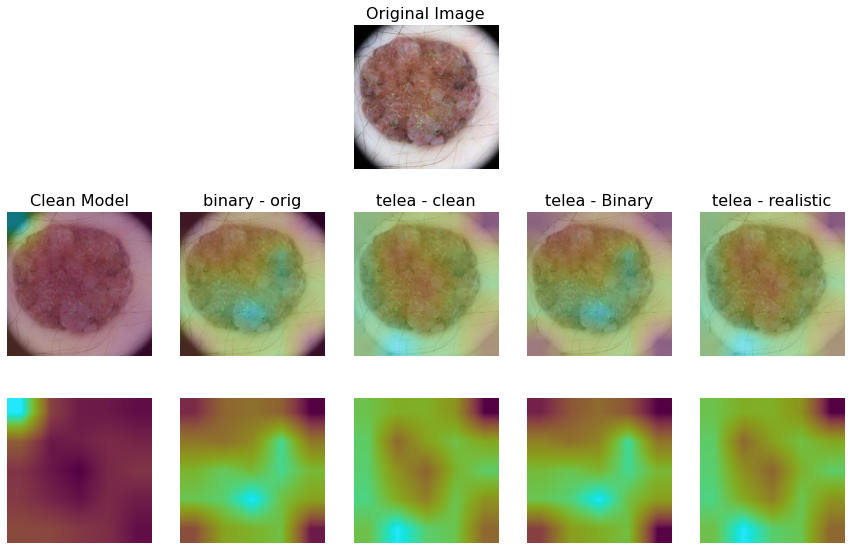

In [8]:
fig, axes = plt.subplots(3, 5, figsize = (15,10));

axes[0][2].imshow(small_image)
axes[0][2].set_title("Original Image", fontsize=16)

axes[1][0].set_title("Clean Model", fontsize=16);
axes[1][0].imshow(base_small_output);
axes[2][0].imshow(base_small_heatmap);


axes[1][1].set_title("binary - orig", fontsize=16);
axes[1][1].imshow(bin_small_output);
axes[2][1].imshow(bin_small_heatmap);


axes[1][2].set_title("telea - clean", fontsize=16);
axes[1][2].imshow(telea_base_small_output);
axes[2][2].imshow(telea_base_small_heatmap);

axes[1][3].set_title("telea - Binary", fontsize=16);
axes[1][3].imshow(telea_bin_small_output);
axes[2][3].imshow(telea_bin_small_heatmap);

axes[1][4].set_title("telea - realistic", fontsize=16);
axes[1][4].imshow(telea_real_small_output);
axes[2][4].imshow(telea_real_small_heatmap);


for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## NS images - Small

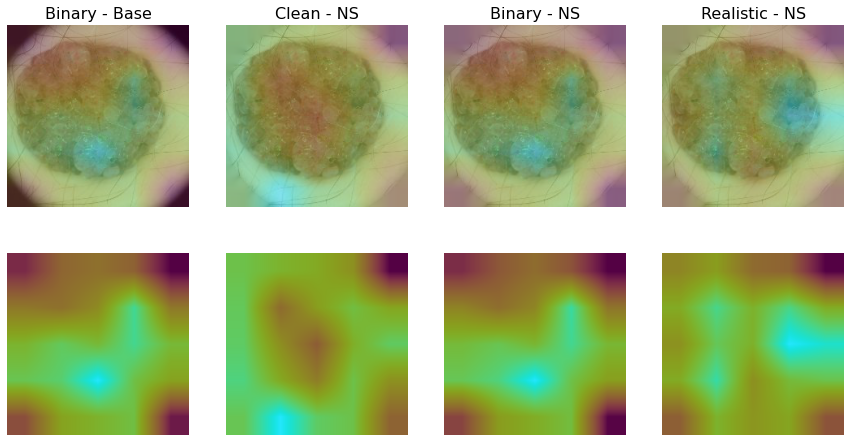

In [9]:
# SMALL
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_small_output);axes[1][0].imshow(bin_small_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_small_output);axes[1][1].imshow(ns_base_small_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_small_output);axes[1][2].imshow(ns_bin_small_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_small_output);axes[1][3].imshow(ns_real_small_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## NS - Medium

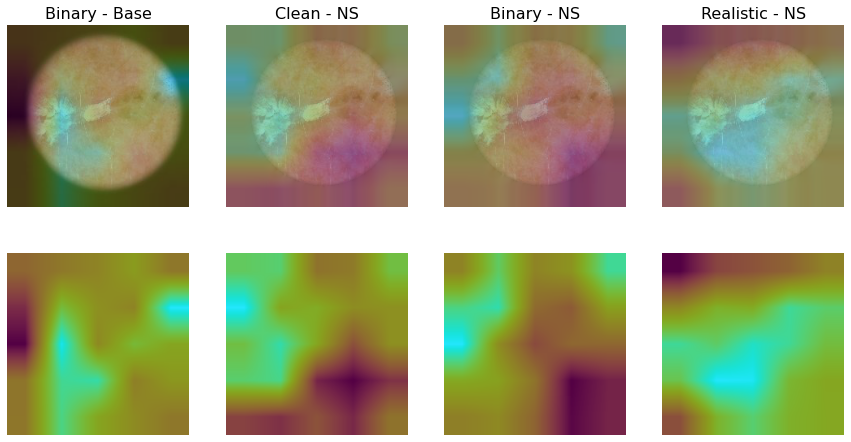

In [10]:
# MEDIJM
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_medium_output);axes[1][0].imshow(bin_medium_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_medium_output);axes[1][1].imshow(ns_base_medium_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_medium_output);axes[1][2].imshow(ns_bin_medium_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_medium_output);axes[1][3].imshow(ns_real_medium_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## NS - Large

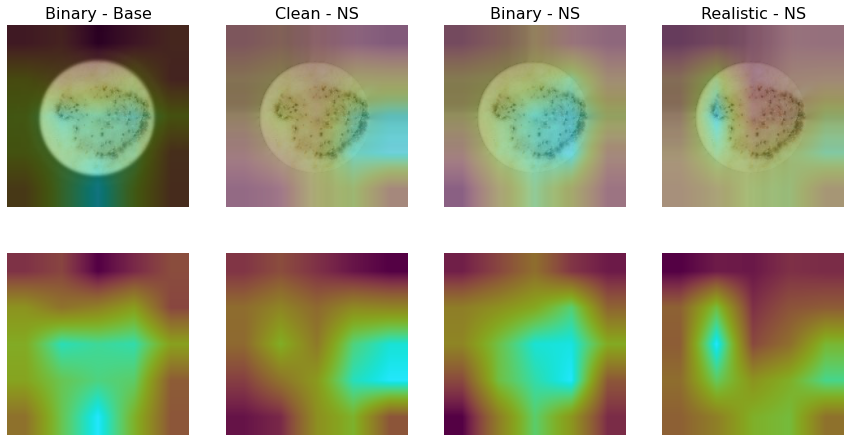

In [11]:
# MEDIJM
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_large_output);axes[1][0].imshow(bin_large_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_large_output);axes[1][1].imshow(ns_base_large_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_large_output);axes[1][2].imshow(ns_bin_large_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_large_output);axes[1][3].imshow(ns_real_large_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## NS- Oth

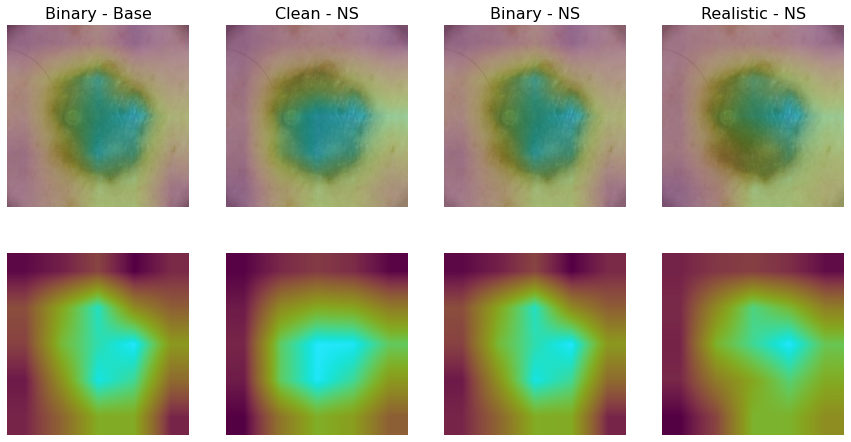

In [12]:
# Oth
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_oth_output);axes[1][0].imshow(bin_oth_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_oth_output);axes[1][1].imshow(ns_base_oth_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_oth_output);axes[1][2].imshow(ns_bin_oth_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_oth_output);axes[1][3].imshow(ns_real_oth_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## Telea - Small

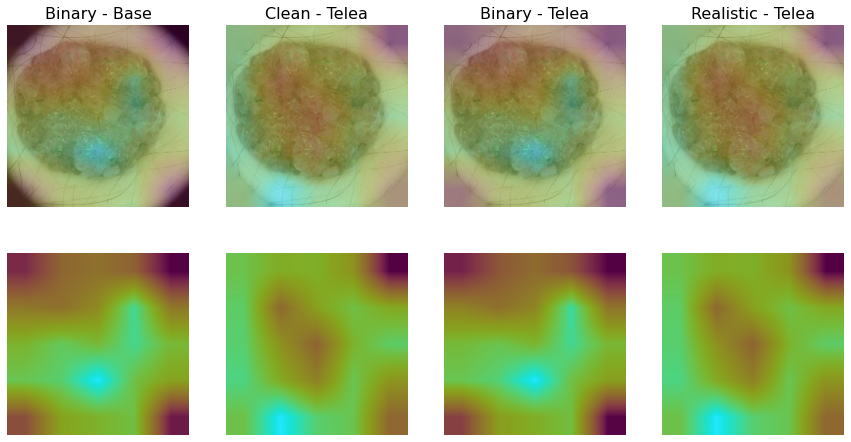

In [13]:
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_small_output);axes[1][0].imshow(bin_small_heatmap);
axes[0][1].set_title("Clean - Telea", fontsize=16);axes[0][1].imshow(telea_base_small_output);axes[1][1].imshow(telea_base_small_heatmap);
axes[0][2].set_title("Binary - Telea", fontsize=16);axes[0][2].imshow(telea_bin_small_output);axes[1][2].imshow(telea_bin_small_heatmap);
axes[0][3].set_title("Realistic - Telea", fontsize=16);axes[0][3].imshow(telea_real_small_output);axes[1][3].imshow(telea_real_small_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## Telea - Medium

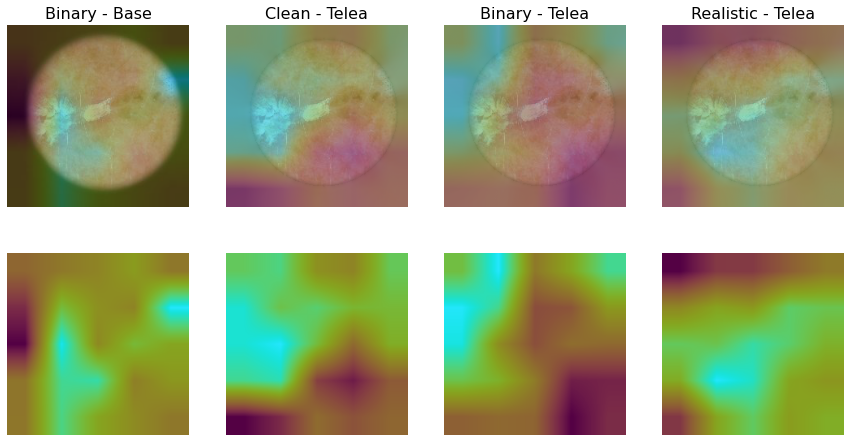

In [14]:
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_medium_output);axes[1][0].imshow(bin_medium_heatmap);
axes[0][1].set_title("Clean - Telea", fontsize=16);axes[0][1].imshow(telea_base_medium_output);axes[1][1].imshow(telea_base_medium_heatmap);
axes[0][2].set_title("Binary - Telea", fontsize=16);axes[0][2].imshow(telea_bin_medium_output);axes[1][2].imshow(telea_bin_medium_heatmap);
axes[0][3].set_title("Realistic - Telea", fontsize=16);axes[0][3].imshow(telea_real_medium_output);axes[1][3].imshow(telea_real_medium_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## Telea - Large

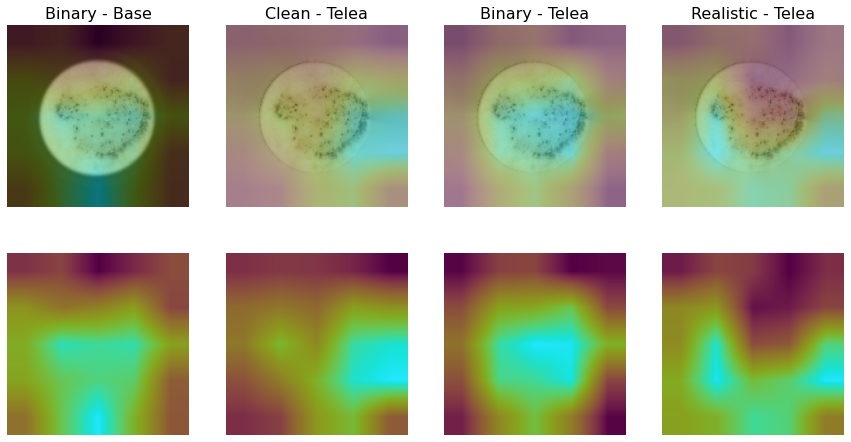

In [15]:
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_large_output);axes[1][0].imshow(bin_large_heatmap);
axes[0][1].set_title("Clean - Telea", fontsize=16);axes[0][1].imshow(telea_base_large_output);axes[1][1].imshow(telea_base_large_heatmap);
axes[0][2].set_title("Binary - Telea", fontsize=16);axes[0][2].imshow(telea_bin_large_output);axes[1][2].imshow(telea_bin_large_heatmap);
axes[0][3].set_title("Realistic - Telea", fontsize=16);axes[0][3].imshow(telea_real_large_output);axes[1][3].imshow(telea_real_large_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## Telea - Oth

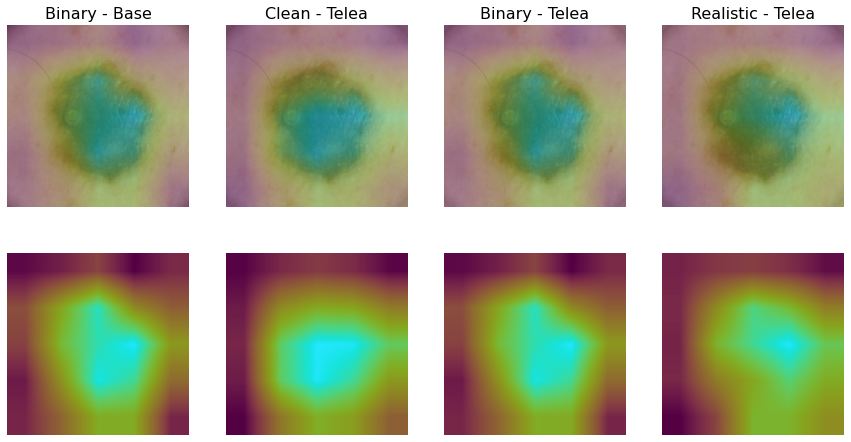

In [16]:
fig, axes = plt.subplots(2, 4, figsize = (15,8));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_oth_output);axes[1][0].imshow(bin_oth_heatmap);
axes[0][1].set_title("Clean - Telea", fontsize=16);axes[0][1].imshow(telea_base_oth_output);axes[1][1].imshow(telea_base_oth_heatmap);
axes[0][2].set_title("Binary - Telea", fontsize=16);axes[0][2].imshow(telea_bin_oth_output);axes[1][2].imshow(telea_bin_oth_heatmap);
axes[0][3].set_title("Realistic - Telea", fontsize=16);axes[0][3].imshow(telea_real_oth_output);axes[1][3].imshow(telea_real_oth_heatmap);

for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

## Mixed - Medium

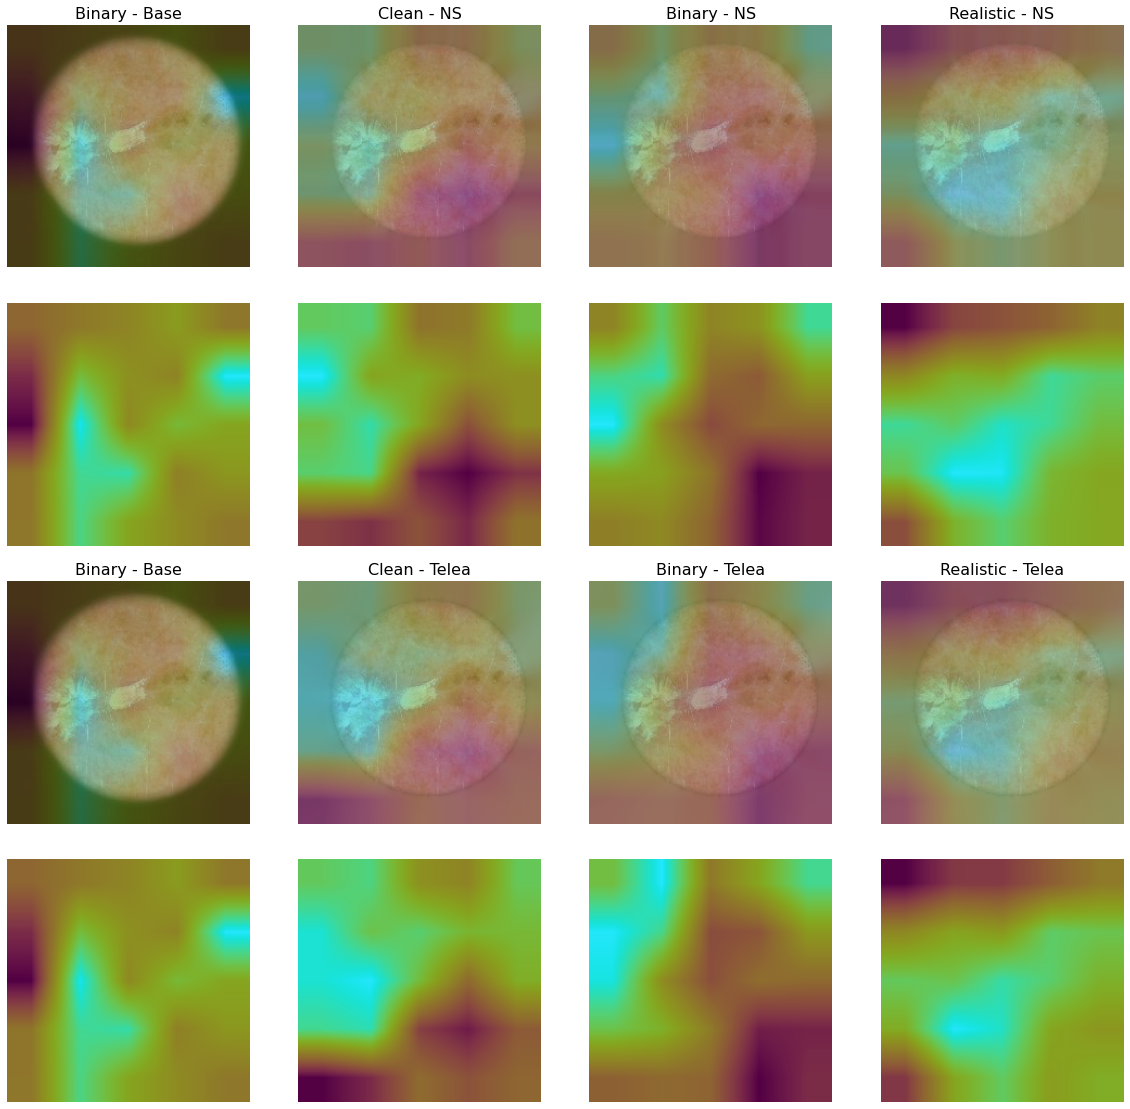

In [19]:
# MEDIJM
fig, axes = plt.subplots(4, 4, figsize = (20,20));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_medium_output);axes[1][0].imshow(bin_medium_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_medium_output);axes[1][1].imshow(ns_base_medium_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_medium_output);axes[1][2].imshow(ns_bin_medium_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_medium_output);axes[1][3].imshow(ns_real_medium_heatmap);

axes[2][0].set_title("Binary - Base", fontsize=16);axes[2][0].imshow(bin_medium_output);axes[3][0].imshow(bin_medium_heatmap);
axes[2][1].set_title("Clean - Telea", fontsize=16);axes[2][1].imshow(telea_base_medium_output);axes[3][1].imshow(telea_base_medium_heatmap);
axes[2][2].set_title("Binary - Telea", fontsize=16);axes[2][2].imshow(telea_bin_medium_output);axes[3][2].imshow(telea_bin_medium_heatmap);
axes[2][3].set_title("Realistic - Telea", fontsize=16);axes[2][3].imshow(telea_real_medium_output);axes[3][3].imshow(telea_real_medium_heatmap);


for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)


plt.savefig(r'../../mixed_medium_gradcam.png')

## Mixed - Large

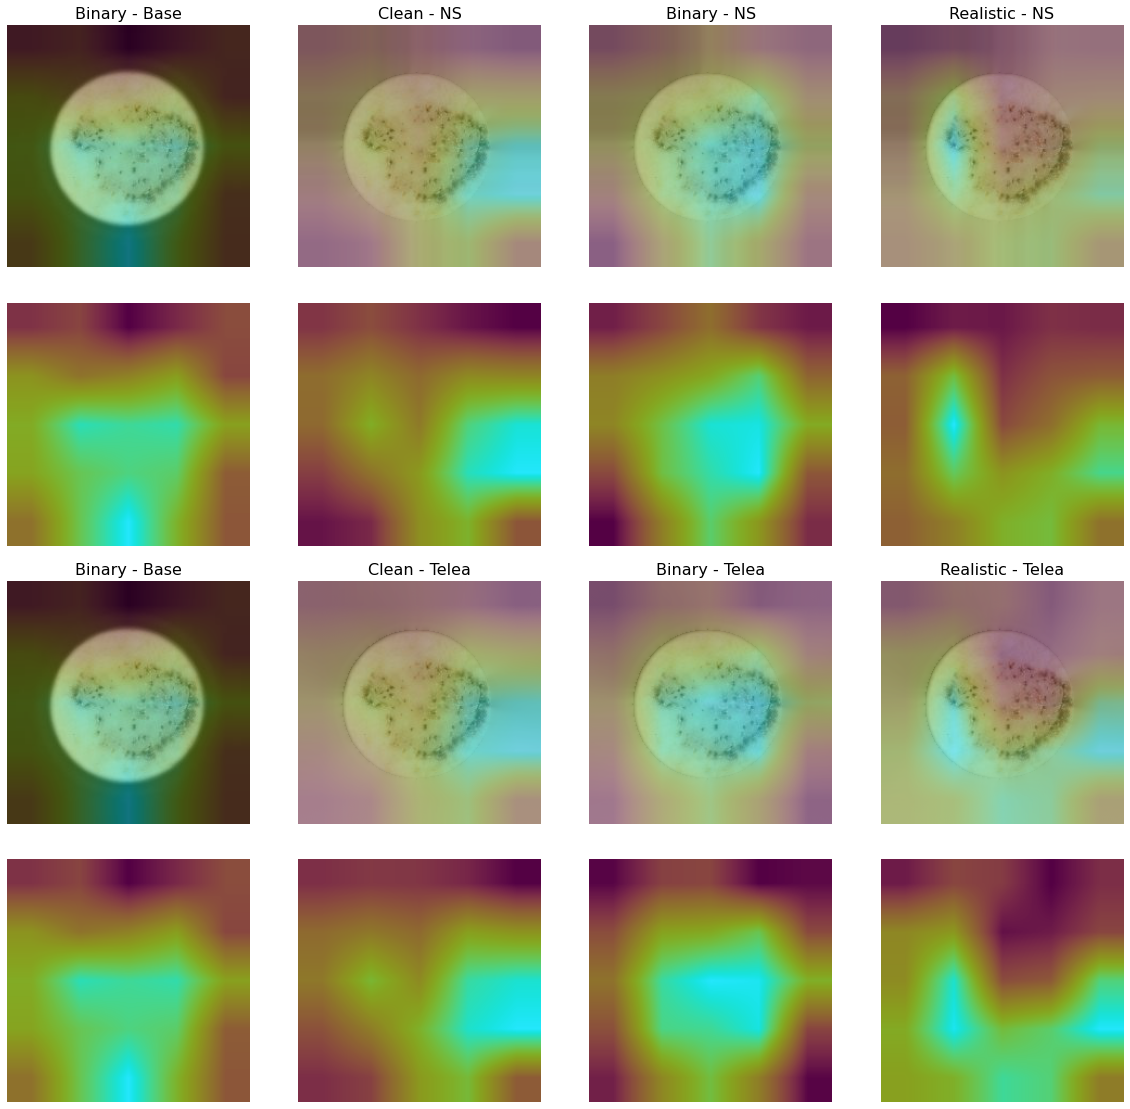

In [20]:
fig, axes = plt.subplots(4, 4, figsize = (20,20));
axes[0][0].set_title("Binary - Base", fontsize=16);axes[0][0].imshow(bin_large_output);axes[1][0].imshow(bin_large_heatmap);
axes[0][1].set_title("Clean - NS", fontsize=16);axes[0][1].imshow(ns_base_large_output);axes[1][1].imshow(ns_base_large_heatmap);
axes[0][2].set_title("Binary - NS", fontsize=16);axes[0][2].imshow(ns_bin_large_output);axes[1][2].imshow(ns_bin_large_heatmap);
axes[0][3].set_title("Realistic - NS", fontsize=16);axes[0][3].imshow(ns_real_large_output);axes[1][3].imshow(ns_real_large_heatmap);

axes[2][0].set_title("Binary - Base", fontsize=16);axes[2][0].imshow(bin_large_output);axes[3][0].imshow(bin_large_heatmap);
axes[2][1].set_title("Clean - Telea", fontsize=16);axes[2][1].imshow(telea_base_large_output);axes[3][1].imshow(telea_base_large_heatmap);
axes[2][2].set_title("Binary - Telea", fontsize=16);axes[2][2].imshow(telea_bin_large_output);axes[3][2].imshow(telea_bin_large_heatmap);
axes[2][3].set_title("Realistic - Telea", fontsize=16);axes[2][3].imshow(telea_real_large_output);axes[3][3].imshow(telea_real_large_heatmap);


for row in axes:
    for ax in row:
        ax.set_yticklabels([]);ax.set_xticklabels([]);ax.set_xticks([]);ax.set_yticks([]);ax.spines['top'].set_visible(False);ax.spines['right'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False) 
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

plt.savefig(r'../../mixed_large_gradcam.png')